In [22]:
import torch
import matplotlib.pyplot as plt

sample_rate = 1000  # 采样率 (1秒钟采1000个点)
t = torch.linspace(0, 1, sample_rate)  # 时间轴：从0s到1s

# 构造信号：一个 50Hz 的波 + 一个 120Hz 的波
signal = torch.sin(2 * torch.pi * 50 * t) + torch.sin(2 * torch.pi * 120 * t)

In [23]:
def plt_fig(t, signal):
    plt.figure(figsize=(10, 4),dpi=300)
    plt.plot(t[:100], signal[:100], label='Combined Signal')
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

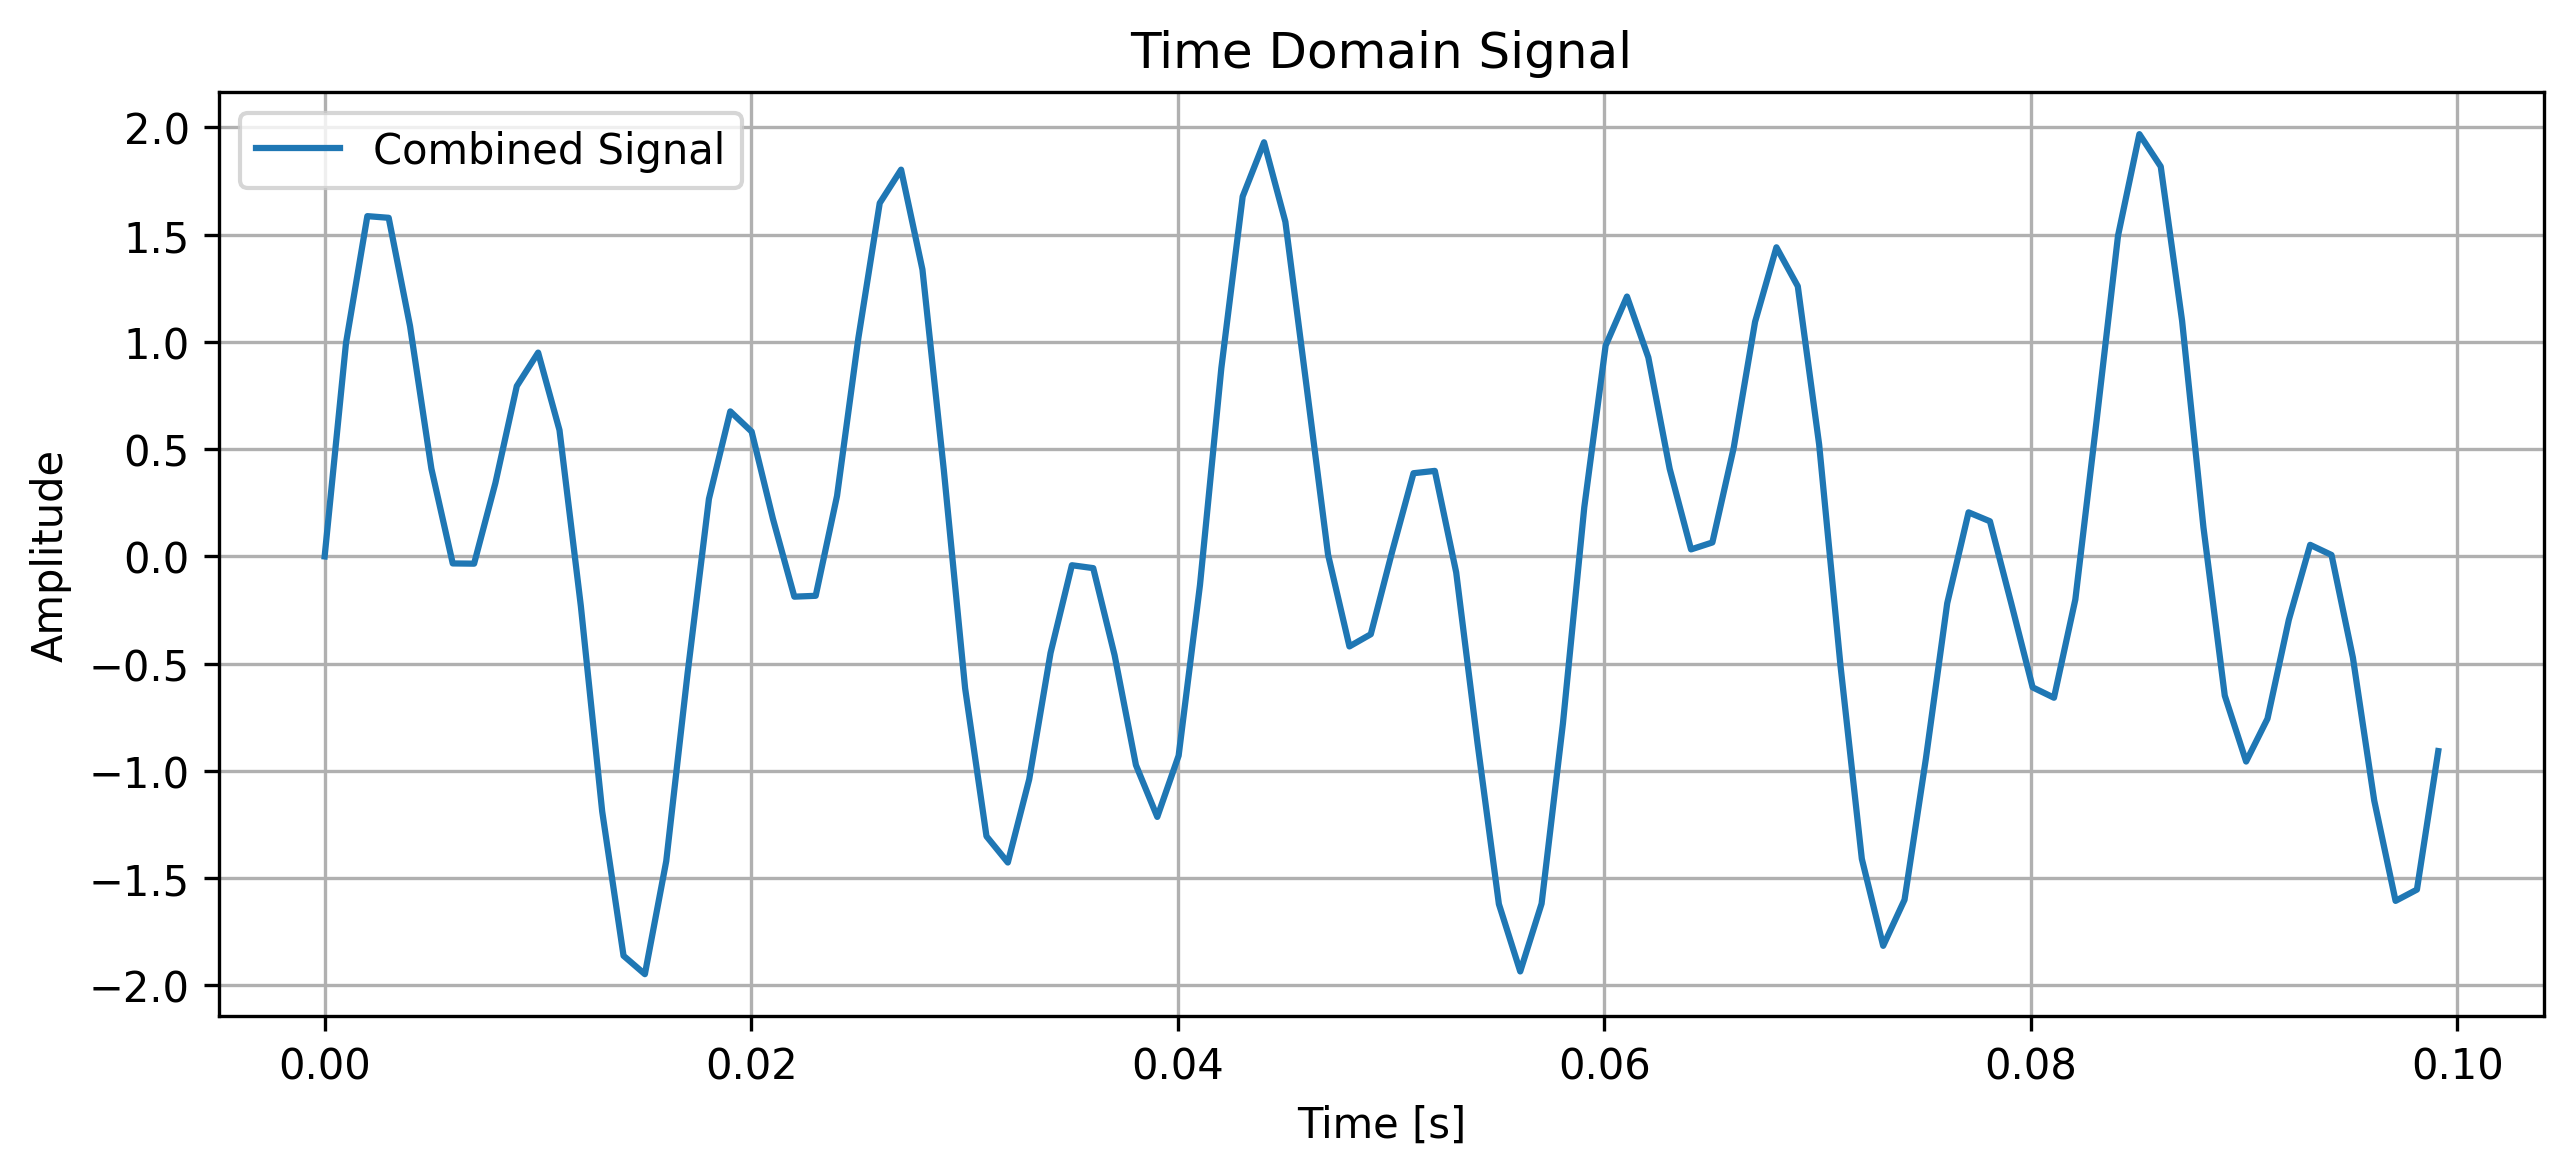

In [24]:
plt_fig(t, signal)

/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 22495 (\N{CJK UNIFIED IDEOGRAPH-57DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_94522/723679779.py:21: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}

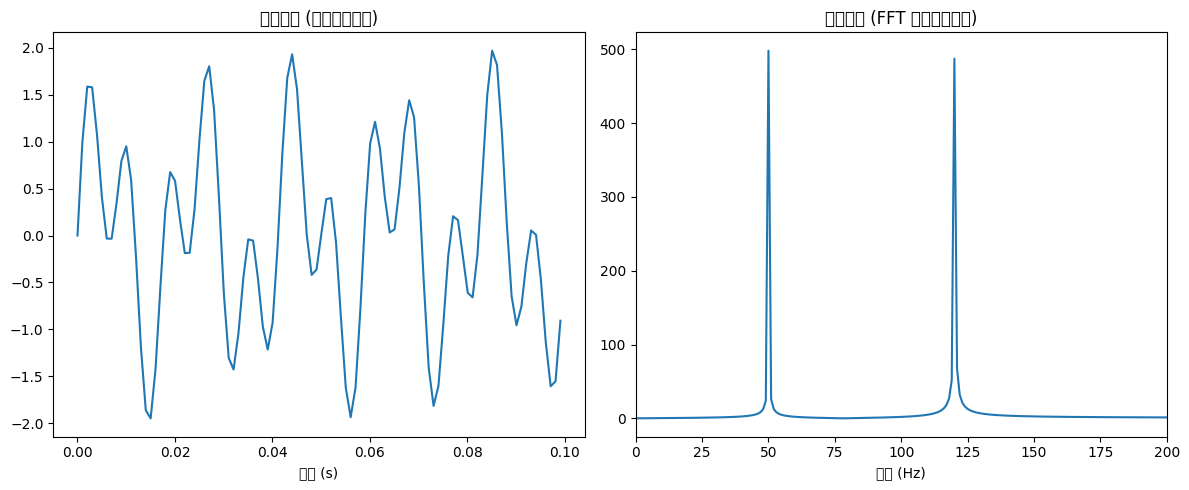

In [25]:
spectrum = torch.fft.rfft(signal)
frequencies = torch.fft.rfftfreq(sample_rate, d=1/sample_rate)

# 4. 获取能量（幅值）
magnitude = torch.abs(spectrum)

# 5. 可视化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t[:100], signal[:100]) # 只看前100个点
plt.title("时域信号 (混合后的波形)")
plt.xlabel("时间 (s)")

plt.subplot(1, 2, 2)
plt.plot(frequencies, magnitude)
plt.title("频域频谱 (FFT 提取出的频率)")
plt.xlabel("频率 (Hz)")
plt.xlim(0, 200) # 限制显示范围，方便观察

plt.tight_layout()
plt.show()